### 의사결정트리 알고리즘 학습 - 분류 + 교차검증


[1] 모듈로딩 및 데이터 준비<hr>

In [363]:
#%pip install graphviz

In [364]:
## [1-1] 모듈로딩 
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt


In [365]:
## [1-2] 데이터 준비
filename='../data/iris.csv'

In [366]:
## 데이터 로딩 
irisDF= pd.read_csv(filename)
irisDF.head(2)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa


[2] 데이터 확인 <hr>

- 2개 품종만 추출 ==> 'Setosa', 'Versicolor'

In [367]:
## 품종 컬럼의 고유값 확인
irisDF.variety.unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

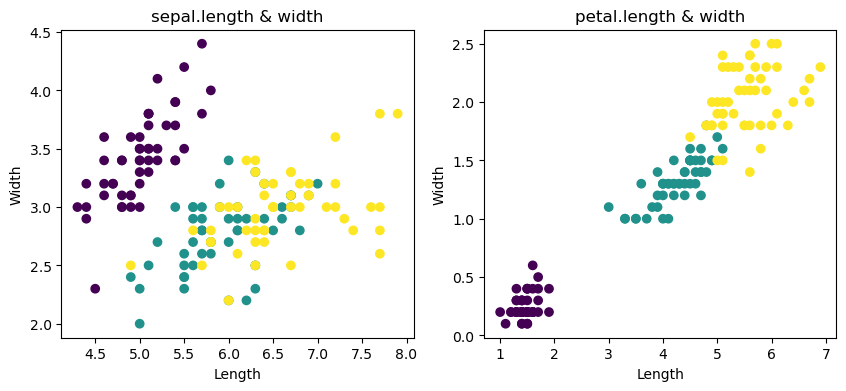

In [368]:
cols = [['sepal.length', 'sepal.width'], ['petal.length', 'petal.width']]
titles = ['sepal.length & width', 'petal.length & width']
colors = [ 0 if varient=='Setosa' else 1 if varient=='Versicolor' else 2 for varient in irisDF['variety']]

fig, axes = plt.subplots(1, 2,figsize=(10,4))
axes=axes.flatten()

for ax, (col1, col2), title in zip(axes, cols, titles):
    ax.scatter(irisDF[col1], irisDF[col2], c=colors)
    ax.set_xlabel('Length')
    ax.set_ylabel('Width')
    ax.set_title(title)
plt.show()

#### [2] 데이터 가공

- 피쳐/특성/독립과 타겟/클래스/종속변수 분리

In [369]:
featureDF = irisDF[irisDF.columns[:-1]]
targetSR = irisDF['variety']

In [370]:
print(f'featureDF : {featureDF.shape}  targetSR : {targetSR.shape}')

featureDF : (150, 4)  targetSR : (150,)


- 훈련용/테스트용 분리

In [371]:
## - 분류 시에는 훈련용/테스트용에 동일한 비율로 타겟이 배분 
## - stratify 매개변수 : 타겟 데이터셋의 클래스/라벨 비율에 맞게 학습용/테스트용 분리 
train_X, test_X, train_y, test_y = train_test_split(featureDF, targetSR,
                                                    random_state=7,
                                                    test_size=0.2,
                                                    stratify=targetSR)

In [372]:
print(f'[TRAIN] train_X : {train_X.shape}  train_y : {train_y.shape}')
print(f'[TEST] test_X : {test_X.shape}  test_y : {test_y.shape}')

[TRAIN] train_X : (120, 4)  train_y : (120,)
[TEST] test_X : (30, 4)  test_y : (30,)


In [373]:
## 데이터셋별로 클래스 갯수 확인
test_y.value_counts(), train_y.value_counts()

(variety
 Virginica     10
 Setosa        10
 Versicolor    10
 Name: count, dtype: int64,
 variety
 Virginica     40
 Setosa        40
 Versicolor    40
 Name: count, dtype: int64)

- 특성/피쳐 2개에 대한 스케일링 진행 ==> 피쳐의 값의 범위 일치

In [374]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder

In [375]:
## StandardScaler : 평균 0, 표준편차 1 즉, 정규분포 따르도록 스케일링
## 훈련용 DS기반의 스케일러는 테스트용 DS, 사용자 데이터에 대해 스케일링 진행 함
scaler = StandardScaler()

scaler.fit(train_X)


StandardScaler()

In [376]:
## fit() 후에 설정되는 파라미터들 ==> 모델 파라미터 
print(scaler.var_, scaler.mean_)

[0.7        0.18871597 3.1731     0.59086042] [5.85       3.06083333 3.78       1.2075    ]


In [377]:
# 훈련데이터와 테스트 데이터 스케일링 진행
# ==> 훈련용 생성한 스케일러로 훈련용, 테스트용 변환 진행 
# ==> 향후 임의의 새로운 데이터 예측(predict)시에도 해당 스케일러 적용
train_scaled_X = scaler.transform(train_X)
test_scaled_X = scaler.transform(test_X)

In [378]:
## LabelEncoder : 
lencoder = LabelEncoder()
lencoder.fit(targetSR)
print(lencoder.classes_)

['Setosa' 'Versicolor' 'Virginica']


In [379]:
targetSR=lencoder.transform(targetSR)

#### [3] 학습 
- 메인학습 : 지도학습 - 분류
- 세부학습 : 의사결정 학습 알고리즘 => 다중 분류 : 3개의 품종 분류


In [380]:
# 학습 진행 

from sklearn.tree import DecisionTreeClassifier # 모델 클래스
from sklearn.tree import export_graphviz 	# 모델 시각화 관련

In [381]:
dt_Model = DecisionTreeClassifier(max_depth=2)
dt_Model.fit(train_scaled_X, train_y)

DecisionTreeClassifier(max_depth=2)

In [382]:
# 학습 모델 시각화 파일 저장
export_graphviz(dt_Model, out_file='irisDT.dot', feature_names=train_X.columns, 
				class_names=train_y.unique(),
				filled=True,
				rounded=True,
				special_characters=True,
				)


In [383]:
train_X.columns , train_y.unique()

(Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width'], dtype='object'),
 array(['Virginica', 'Setosa', 'Versicolor'], dtype=object))

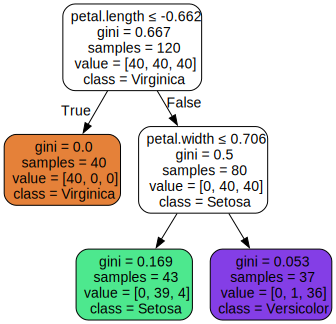

In [384]:
# 모델 파일 dot => 시각화
import graphviz
with open('./irisDT.dot') as f:
	dot_graph = f.read()


# 파일에서 가져온 데이터 출력 ==> 시각화
#print(dot_graph)

graphviz.Source(dot_graph)


####  [4] 성능평가 <hr>

In [385]:
##  훈련용 성능과 테스트용 성능평가
## [1] 모델의 성능평가 메서드 : score()  accuracy로 성능평가 결과 반환
train_score = dt_Model.score(train_scaled_X, train_y)
test_score = dt_Model.score(test_scaled_X, test_y)

print(f'[Train] score : {train_score},  [Test] score : {test_score}')

[Train] score : 0.9583333333333334,  [Test] score : 0.9666666666666667


In [386]:
# [2] 다양한 성능 평가 지표
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss

In [387]:
## [2] 다양한 성능평가 지표 
print('[TRAIN]------------------------')
train_pre = dt_Model.predict(train_scaled_X)

print(f'정확도 : {accuracy_score(train_y, train_pre) }')
print(f'정밀도 : {precision_score(train_y, train_pre, average="macro") }')
print(f'재현율 : {recall_score(train_y, train_pre,average="macro") }')
print(f'f1점수 : {f1_score(train_y, train_pre,average="macro") }')

[TRAIN]------------------------
정확도 : 0.9583333333333334
정밀도 : 0.9599832390530064
재현율 : 0.9583333333333334
f1점수 : 0.9582746570698378


In [388]:
print('[TEST]------------------------')
test_pre = dt_Model.predict(test_scaled_X)

print(f'정확도 : {accuracy_score(test_y, test_pre) }')
print(f'정밀도 : {precision_score(test_y, test_pre,average="macro") }')
print(f'재현율 : {recall_score(test_y, test_pre,average="macro") }')
print(f'f1점수 : {f1_score(test_y, test_pre,average="macro") }')

[TEST]------------------------
정확도 : 0.9666666666666667
정밀도 : 0.9696969696969697
재현율 : 0.9666666666666667
f1점수 : 0.9665831244778613


In [389]:

## [3] 손실/비용 계산 => 확률값으로 
proba = dt_Model.predict_proba(train_scaled_X)
probatest = dt_Model.predict_proba(test_scaled_X)

train_loss = log_loss(train_y, proba)
test_loss = log_loss(test_y, probatest)

In [390]:
print(f'[Train Loss] {train_loss}  [Test Loss] {test_loss}')

[Train Loss] 0.14920670262253138  [Test Loss] 0.11992937393019548


In [391]:
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict

In [392]:
result=cross_val_score(dt_Model,train_scaled_X, train_y)
result

array([1.        , 0.95833333, 0.91666667, 0.91666667, 0.875     ])

In [393]:
result=cross_val_predict(dt_Model,train_scaled_X, train_y)
result

array(['Virginica', 'Setosa', 'Virginica', 'Virginica', 'Virginica',
       'Virginica', 'Setosa', 'Virginica', 'Setosa', 'Versicolor',
       'Virginica', 'Virginica', 'Setosa', 'Virginica', 'Versicolor',
       'Virginica', 'Versicolor', 'Setosa', 'Versicolor', 'Setosa',
       'Setosa', 'Versicolor', 'Setosa', 'Virginica', 'Versicolor',
       'Versicolor', 'Setosa', 'Versicolor', 'Setosa', 'Versicolor',
       'Virginica', 'Versicolor', 'Versicolor', 'Setosa', 'Versicolor',
       'Virginica', 'Virginica', 'Setosa', 'Virginica', 'Versicolor',
       'Virginica', 'Virginica', 'Versicolor', 'Versicolor', 'Setosa',
       'Virginica', 'Setosa', 'Virginica', 'Setosa', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Virginica',
       'Versicolor', 'Virginica', 'Setosa', 'Versicolor', 'Setosa',
       'Virginica', 'Versicolor', 'Setosa', 'Virginica', 'Versicolor',
       'Versicolor', 'Versicolor', 'Setosa', 'Versicolor', 'Virginica',
       'Setosa', 'Setosa', 'Virginic

In [394]:
cross_validate(dt_Model, train_scaled_X, train_y)

{'fit_time': array([0.00768423, 0.00654817, 0.00888324, 0.00450921, 0.00699973]),
 'score_time': array([0.0049994 , 0.00604773, 0.00403452, 0.00858235, 0.00466633]),
 'test_score': array([1.        , 0.95833333, 0.91666667, 0.91666667, 0.875     ])}

[교차 검증과 CV]

In [395]:
# 모듈로딩
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [396]:
# 
param  = {'max_depth':[2,3,5], 'criterion': ['gini','entropy','log_loss']}



lr_model  = DecisionTreeClassifier()


gridCV = GridSearchCV(lr_model,param, scoring=('accuracy'), refit=True)


gridCV.fit(train_scaled_X,train_y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 5]},
             scoring='accuracy')

In [397]:
# 교차 검증 및 튜닝 후 결과
print(f'가장 좋은 성능의 CV 번호 :{gridCV.best_index_}')
print(f'가장 좋은 성능의 하이퍼파라미터 조합 :{gridCV.best_params_}')
print(f'가장 좋은 성능의 점수 :{gridCV.best_score_}')
print(f'가장 좋은 성능의 재학습된 모델 객체 :{gridCV.best_estimator_}')

가장 좋은 성능의 CV 번호 :8
가장 좋은 성능의 하이퍼파라미터 조합 :{'criterion': 'log_loss', 'max_depth': 5}
가장 좋은 성능의 점수 :0.95
가장 좋은 성능의 재학습된 모델 객체 :DecisionTreeClassifier(criterion='log_loss', max_depth=5)


In [398]:
# 가장 좋은 모델 선정
best_model = gridCV.best_estimator_

In [399]:
gridCV.best_estimator_

DecisionTreeClassifier(criterion='log_loss', max_depth=5)

[사용자 예측]

In [400]:
# # 사용자 데이터 ==> 모델 데이터 형태
user_data = pd.DataFrame( [[4.5,9.3,5.7,9.0]], columns=train_X.columns)


## 모델에서 사용하는 Scaler, encoder 적용

user_data = scaler.transform(user_data)

In [401]:
best_model.predict(user_data)

array(['Virginica'], dtype=object)

[ 의사결정 학습 알고리즘 장점]
-	성능 좋은 피쳐 찾아주기

In [402]:
best_model.feature_importances_

array([0.0105155 , 0.        , 0.64407648, 0.34540802])

In [403]:
for f_name , f_importances in zip(train_X.columns, best_model.feature_importances_):
	print(f_name, f_importances)

sepal.length 0.010515495892857624
sepal.width 0.0
petal.length 0.6440764816667752
petal.width 0.34540802244036717
